In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt # 取代cv2进行显示图片

In [5]:
# load img as bgr
img = cv2.imread("datasets/VisDrone2019-MOT-train/sequences/uav0000013_00000_v/0000001.jpg", 1)

In [6]:
img.shape

(756, 1344, 3)

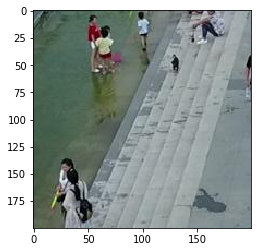

In [12]:
%matplotlib inline

plt.imshow(img[400:600, 400:600, ::-1]) # transfer to rgb
plt.show()

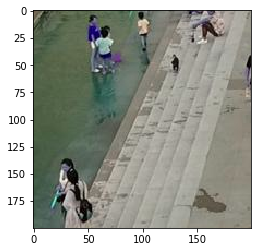

In [13]:
%matplotlib inline

plt.imshow(img[400:600, 400:600, :]) # transfer to rgb
plt.show()

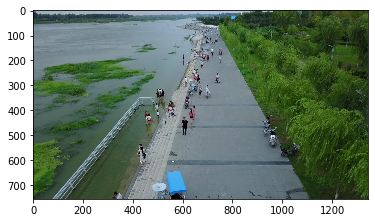

In [18]:
%matplotlib inline

plt.imshow(img[:,:, ::-1]) # transfer to rgb
plt.show()

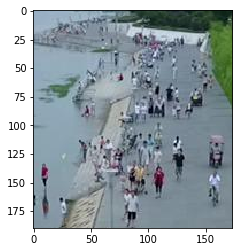

In [23]:
%matplotlib inline

# left, top, width, height, score [0,1]
# 593,43,174,190,0
left = 593
top = 43
width = 174
height = 190
plt.imshow(img[top:top+height, left:left+width, ::-1]) # transfer to rgb
plt.show()

In [17]:
img[top:top+height, left:left+width, ::-1]

array([], shape=(0, 43, 3), dtype=uint8)

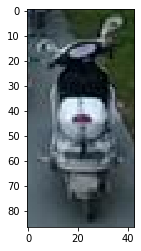

In [22]:
%matplotlib inline

# left, top, width, height, score [0,1]
# 940,466,43,87,1
left = 940
top = 466
width = 43
height = 87
plt.imshow(img[top:top+height, left:left+width, ::-1]) # transfer to rgb
plt.show()

In [14]:
import pandas as pd

In [22]:
df = pd.DataFrame(columns=[
    'frame_index',
    'target_id', 
    'bbox_left', 
    'bbox_top', 
    'bbox_width', 
    'bbox_height', 
    'score', 
    'object_category', 
    'truncation', 
    'occlusion', 
    'sequence_name'])
df

,frame_index,target_id,bbox_left,bbox_top,bbox_width,bbox_height,score,object_category,truncation,occlusion,sequence_name


In [ ]:
annotation_files = !ls datasets/VisDrone2019-MOT-train/annotations
for file in annotation_files:
    